# Quality Assessment for ERA5 Drought Indicator

Production date: DD-MM-YYYY

*Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.*

Produced by: C3S2521 

## 🌍 Use case: Use case listed here in full 

## ❓ Quality assessment question
* **In most cases there should be one question listed here in bold**
* **(In some cases a second related/follow-up question may be included)**

**‘Context paragraph’ (no title/heading)** - a very short introduction before the assessment statement describing approach taken to answer the user question. One or two key references could be useful,  if the assessment summarises literature . These can be referenced directly in the text, like `[Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2)` giving: [Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2). For major references numerical labels like this should be used (which should also listed at the end) `Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2))`giving: Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2)). Please use DOI links where possible.


## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology

A ‘free text’ introduction to the data analysis steps or a description of the literature synthesis, with a justification of the approach taken, and limitations mentioned. **Mention which CDS catalogue entry is used, including a link, and also any other entries used for the assessment**.

Followed by a numbered list of the methodology and results, with the same headings as the sections under ‘Analysis and Results’. These should be links to the sections below, using the format `[](section-label)`. The title of the section will be automatically populated, so no need to repeat the title of the section when referecing it like this.

```{note}
The section labels for the links need to be manually set, as seen below (`(section-1)=`, followed by the heading). These labels will be shown in GitHub but will not appear when the Jupyter Book page is built.
```

* These headings can be specific to the quality assessment, and help guide the user through the ‘story’ of the assessment. This means we cannot pre-define the sections and headings here, as they will be different for each assessment.
* Sub-bullets could be used to outline what will be done/shown/discussed in each section
* The list below is just an example, or may need more or fewer sections, with different headings

E.g. 'The analysis and results are organised in the following steps, which are detailed in the sections below:' 

**[](section-1)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-2)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-1)=
### 1. Section 1 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (**if code is included** - some assessment may review literature or reports like PQARs for ECVs, in which case, a markdown file could be provided instead). Note that some details may be better placed in code comments, rather than in the text above the code cell, to help the flow of the Notebook.

**Code:**

* Cell output should be cleaned up as needed (right click the cell after it has run and delete the output if needed), this can also be done with the `'hide-output'` cell tag, added under 'Common Tools -> Cell Tags' on the right in Jupyter Lab (under the cog icon).
* Please consider when cell output would be useful to include, such as printing the summary of the xarray data cube, or an example image. 
* Please link to any non-standard libraries in the references, including the functions from B-Open (a standard line on this is included in the references section).
* The code cells will be adjusted to be 'collapsed by default' when the Jupyter Book page is built.

In [3]:
# Input / Output
from pathlib import Path
import earthkit.data as ekd
import warnings

# General data handling
import numpy as np
import pandas as pd
import xarray as xr
from functools import partial

# Visualisation
import earthkit.plots as ekp
from earthkit.plots.styles import Style
import matplotlib.pyplot as plt
plt.rcParams["grid.linestyle"] = "--"
from tqdm import tqdm  # Progress bars

# Visualisation in Jupyter book -- automatically ignored otherwise
try:
    from myst_nb import glue
except ImportError:
    glue = None

(section-2)=
### 2. Section 2 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

In [4]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["probability_of_zero_precipitation_spi"],
    "accumulation_period": [
        "3",
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ]
}

In [5]:
data_drought = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
data_drought = data_drought.to_xarray(compat="equals") # Converts to xarray.
data_drought  # Display in notebook 

# Question: if I've downloaded the bulk of the dataset- how do I not go download it again, but take the subset of that dataset?

<xarray.Dataset> Size: 100MB
Dimensions:  (time: 12, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 96B 2020-01-01 2020-02-01 ... 2020-12-01
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    pzero    (time, lat, lon) float64 100MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes: (12/19)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.8
    source:                  DRYFALL v1.0
    institution:             European Centre for Medium-Range Weather Forecasts
    title:                   Quality criteria for the derived standardized dr...
    description:             Monthly quality criteria that define the reliabi...
    ...                      ...
    resolution:              0.25x0.25
    climate_start_date:      1991-01-01
    climate_end_date:        2020-12-31
    frequency:               Monthly
    contact_person:          support@ecmwf.int
    CDO:                     Climate Data Operators version 1.9.10 (https://m...

In [ ]:
global_map = data_drought.sel(time="2023-08-01")
fig = ekp.Figure(rows=1, columns=1, size=(5,5)) # Create the figure with dimensions.
subplot = fig.add_map(domain="Europe") # Put in a panel (add_map).
subplot.grid_cells(global_map, z="SPEI12") # Same as pcolormesh. Dataset, Variable.
subplot.legend(location="right")
    
fig.land() 
fig.coastlines()
fig.borders()
fig.gridlines()

# Can you do time series for two variables at the same time?
# How to plot side by side? Use matplot lib and ax.
# Play around with the ensemble members- how to calculate standard uncertainty between all?
# Creating a filtering function? Say if you wanted to select a range of longitudes and latitudes.
# Creating an animated gif with ensemble members? A slider?

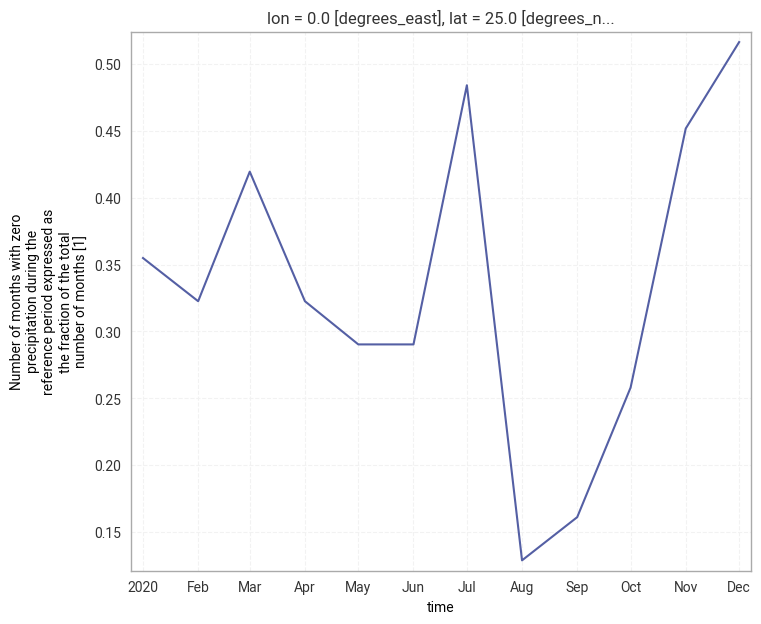

In [19]:
# Try timeseries for a subset of time.

# time_series = data_drought.sel(time = ["2023-01-01","2023-12-31"],lat=51.5, lon=0.0, method="nearest") # Only plots two datapoints.
time_series = data_drought.sel(lat=25, lon=0.0, method="nearest")
time_series["pzero"].plot.line() 

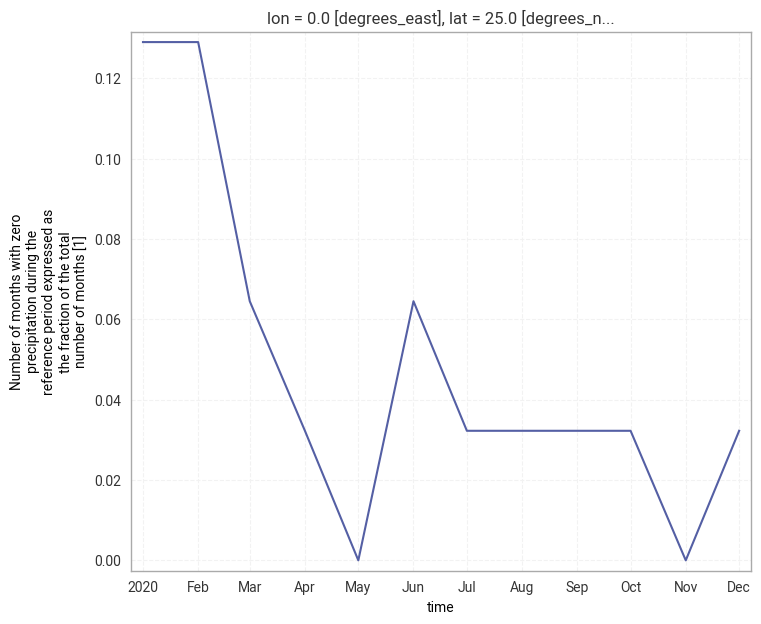

In [27]:
time_series = data_drought.sel(lat=25, lon=0.0, method="nearest") # Why can you not put time in one go?
time_series["pzero"].plot.line()

In [ ]:
# Try timeseries for subset of lon, lat.

# time_series = data_drought.sel(lat=slice(51,52), lon=0.0, method="nearest") # This did not work as could not use method on range.
time_series = data_drought.sel(time="2023-01-01",lon=0.0,method="nearest")
time_series = time_series.sel(lat=slice(54,51)) # Longitude goes from 90 to -90 be careful !!!
time_series["Wind_Speed_10m_Mean_24h"].plot.line()

<xarray.DataArray 'SPEI1' ()> Size: 8B
array(-0.03586025)
Coordinates:
    time     datetime64[ns] 8B 2023-01-01T06:00:00


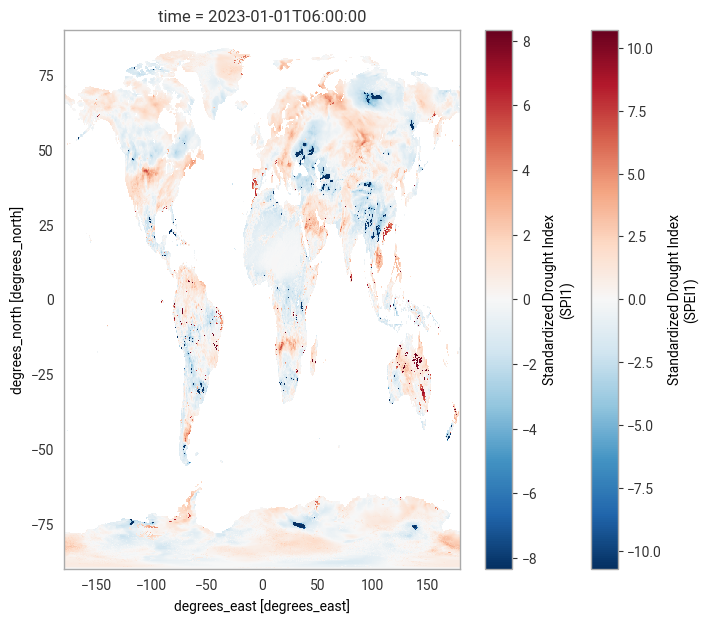

In [11]:
# Try downloading a different variable.

# time_series = data_drought.sel(lat=51.5, lon=0.0, method="nearest")
# time_series = data_drought.sel(time="2023-01-01") # This did not work as could not use method on range.

time_series = data_drought.sel(time="2023-01-01",method="nearest")
global_mean = time_series["SPEI1"].mean() # Global mean has been successfully computed, but it's still a lazy Dask array
print(global_mean.compute()) # Triggers to print computation.


time_series["SPEI1"].plot.pcolormesh() # Why did I need to squeeze the dimension here? -> because there can be multiple measurements in a day.
time_series["SPI1"].plot.pcolormesh() 



In [9]:
time_series["SPEI1"]

<xarray.DataArray 'SPEI1' (time: 1, lat: 721, lon: 1440)> Size: 8MB
dask.array<getitem, shape=(1, 721, 1440), dtype=float64, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 8B 2023-01-01T06:00:00
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Attributes:
    long_name:  Standardized Drought Index (SPEI1)

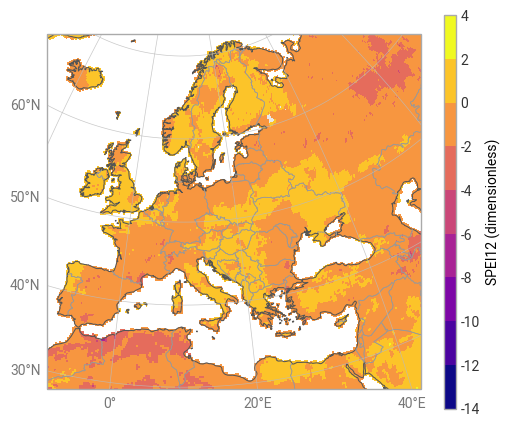

In [165]:
# Yearly average at each pixel.

global_mean = data_drought["SPEI12"].mean("time") # Calculates mean along time axis.
fig = ekp.Figure(rows=1, columns=1, size=(5,5)) # Create the figure with dimensions.
subplot = fig.add_map(domain="Europe") # Put in a panel (add_map).
subplot.grid_cells(global_mean, z="SPEI12") # Same as pcolormesh. Dataset, Variable.
subplot.legend(location="right")
    
fig.land() 
fig.coastlines()
fig.borders()
fig.gridlines()

#### Read in total precipitation data (monthly) from ERA5 analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import earthkit.data
import numpy as np
import scipy.stats as stats    

In [4]:
lat = 50.86
lng = 4.35
variable = "total_precipitation"
date_range = ["1940-01-01", "2020-12-31"]

In [5]:
def retrieve_data(variable, date_range, lat, lng):
    # Define the dataset and request parameters
    dataset = "reanalysis-era5-single-levels-timeseries"
    request = {
        "variable": [
        variable,  # Variable to retrieve
        ],
        "date": date_range,  # Date range for the data
        "location": {"longitude": lng, "latitude": lat},  # Location coordinates
        "data_format": "netcdf"  # Format of the retrieved data
    }

    # Use "earthkit" to retrieve the data
    ekds = earthkit.data.from_source(
        "cds", dataset, request
    ).to_xarray()

    return ekds

In [6]:
data = retrieve_data(variable, date_range, lat, lng)

In [7]:
# Make a function to compute the monthly precipitation climatology
def precipMonthly(data):
    """
    Calculate the monthly climatology of precipitation.

    This function reads precipitation data from a NetCDF file,
    converts the time coordinate to a pandas datetime index,
    and then resamples the data to calculate the monthly 
    climatology. The resulting climatology is returned in millimeters.

    Returns:
        pandas.DataFrame: A DataFrame containing the monthly climatology
        of precipitation in millimeters, indexed by month.
    """
    
    data_tp_pt = data.tp # Accessing total precipitation.

    # Convert the time coordinate to a pandas datetime index
    time_index = pd.to_datetime(data_tp_pt.valid_time.values)

    # Create a DataFrame for easier manipulation
    df = pd.DataFrame(data_tp_pt.values*1000, index=time_index, columns=['tp (mm)'])

    df_monthly = df.resample('MS').sum() # .gives monthly totals by summing precipitation within each month.
    df_monthly['month'] = df_monthly.index.month # Extracts the month number (1–12) from the index and adds it as a column.
    monthly_climatology = df_monthly.groupby('month').mean()

    # Get the actual lat/lon used
    nearest_lat = data_tp_pt.latitude.values
    nearest_lng = data_tp_pt.longitude.values

    return df_monthly, monthly_climatology, nearest_lat, nearest_lng


# Call our function
df_monthly, clim, nearest_lat, nearest_lng = precipMonthly(data)

In [8]:
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Source - https://stackoverflow.com/questions/14313510/how-can-i-calculate-a-rolling-moving-average-using-python-numpy-scipy
# Posted by yatu
# Retrieved 11/5/2025, License - CC BY-SA 4.0

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


for period in acc_periods:
    x = df_monthly['tp (mm)'].values
    conv_result = moving_average(x,period)  # rolling average
    
    # Create an array of full length with NaNs
    aligned = np.full(len(df_monthly), np.nan)
    
    # Place convolution result starting at index period-1
    aligned[period-1:] = conv_result
    
    df_monthly[f"Accumulation-{period} months"] = aligned

In [9]:
df_monthly

,tp (mm),month,Accumulation-1 months,Accumulation-3 months,Accumulation-6 months,Accumulation-12 months,Accumulation-24 months,Accumulation-36 months,Accumulation-48 months
1940-01-01,37.723541,1,37.723541,NaN,NaN,NaN,NaN,NaN,NaN
1940-02-01,34.663200,2,34.663200,NaN,NaN,NaN,NaN,NaN,NaN
1940-03-01,54.683449,3,54.683449,42.356730,NaN,NaN,NaN,NaN,NaN
1940-04-01,77.643631,4,77.643631,55.663427,NaN,NaN,NaN,NaN,NaN
1940-05-01,43.498993,5,43.498993,58.608691,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-01,59.048653,8,59.048653,57.398955,46.764929,61.878482,61.704695,62.948849,59.903194
2020-09-01,66.000938,9,66.000938,60.025851,46.502113,63.400189,62.070608,62.467204,60.815473
2020-10-01,104.117630,10,104.117630,76.389074,60.241580,63.925762,64.748356,64.337458,62.143122
2020-11-01,32.536030,11,32.536030,67.551533,62.475244,60.644050,64.077466,62.908271,61.281199


#### Accumulation period comparison

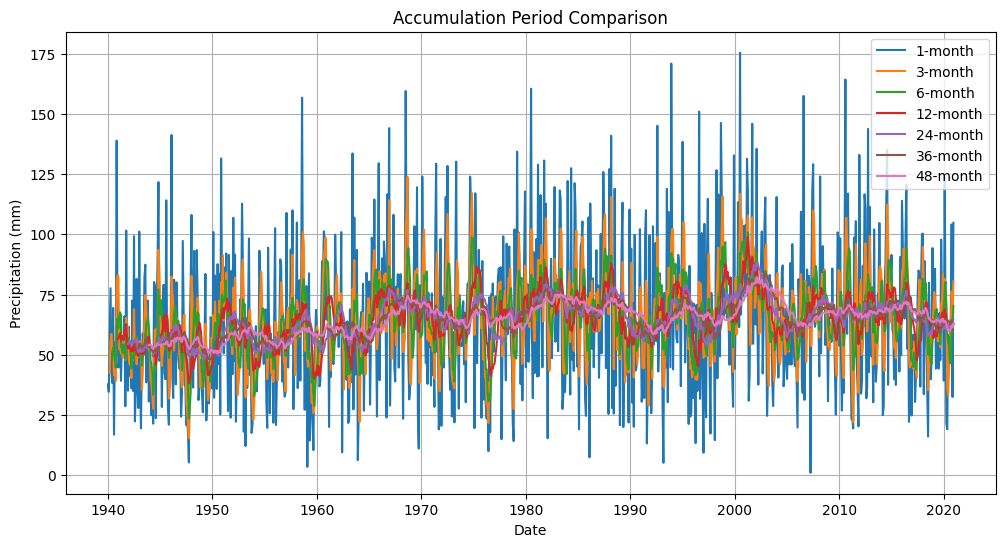

In [10]:
plt.figure(figsize=(12, 6))
for period in acc_periods:
    plt.plot(df_monthly.index, df_monthly[f"Accumulation-{period} months"], label=f"{period}-month")
plt.title("Accumulation Period Comparison")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.show()

#### Fitting gamma distributino to different accumulation periods.

In [11]:
acc_periods = [12]
alpha_params = []
loc_params = []
beta_params = []
start_reference_date = "1991-01-01"
end_reference_date = "2020-12-01"

for period in acc_periods:
    data = df_monthly[f"Accumulation-{period} months"]
    data = df_monthly.loc[start_reference_date:end_reference_date, f"Accumulation-{period} months"].dropna()
    
    fit_alpha, fit_loc, fit_beta=stats.gamma.fit(data) # fit gamma distribution, skip NaN    
    alpha_params.append(fit_alpha), loc_params.append(fit_loc), beta_params.append(fit_beta)


    # Generate x range for PDF
    x = np.linspace(0, 200, 400)
    pdf_values = stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta)    
    cdf_values = stats.gamma.cdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta)   
    ppf_values = stats.norm.ppf(cdf_values, loc=0, scale=1)
    
    pdf_ppf_values = stats.norm.ppf(stats.gamma.cdf(data,a=fit_alpha, loc=fit_loc, scale=fit_beta),loc=0, scale=1)
    
    plt.plot(cdf_values, label=f"SPI-{period}")
    # plt.hist(pdf_ppf_values, density=True, bins=20, histtype='stepfilled')
    # plt.plot(ppf_values, pdf_values, label=f"SPI-{period}")
    
plt.title("SPI")
# plt.xlabel("Precipitation Value (mm)")
plt.xlabel("SPI")
plt.legend()
plt.show()

# plt.plot(df_monthly.index, stats.gamma.pdf(df_monthly.index,fit_alpha), label=f"{period}-month")

# Refactor code
# One function that takes a dataset of precipitations in the reference window and returns a function that calculates SPI/SPEI.
# Function that takes dataset and fits gamma distribution -> will also include zero values.
# 

NameError: name 'start_date' is not defined

In [ ]:
df_monthly

(section-3)=
### 3. Section 3 title
#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

In [ ]:
# collapsable code cells

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-4)=
### 4. Section 4 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does(if code is included).

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-5)=
### 5. Section 5 title 

#### Results Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included). 

If this is the **results section**, we expect the final plots to be created here with a description of how to interpret them, and what information can be extracted for the specific use case and user question. The information in the 'quality assessment statement' should be derived here. 

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

List the references used in the Notebook here.

E.g.

[[1]](https://doi.org/10.1038/s41598-018-20628-2) Rodriguez, D., De Voil, P., Hudson, D., Brown, J. N., Hayman, P., Marrou, H., & Meinke, H. (2018). Predicting optimum crop designs using crop models and seasonal climate forecasts. Scientific reports, 8(1), 2231.